<a href="https://colab.research.google.com/github/PavithraEswaramoorthy/Real-time-hand-gesture-recognition-using-DL/blob/main/DL_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
!pip install -q opendatasets
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/ash2703/handsignimages")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pavithrae21alr030
Your Kaggle Key: ··········


100%|██████████| 23.1M/23.1M [00:00<00:00, 47.2MB/s]


In [ ]:
train_directory='/content/handsignimages/Train'
test_directory='/content/handsignimages/Test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
train_directory,
target_size=(28,28),
    batch_size=32,
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
test_directory,
target_size=(28,28),
    batch_size=32,
    class_mode='categorical'
)

Found 27455 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(train_generator,epochs=25,validation_data=test_generator)

Epoch 1/25
858/858 [==============================] - 39s 45ms/step - loss: 1.3756 - accuracy: 0.5651 - val_loss: 0.5223 - val_accuracy: 0.8320
Epoch 2/25
858/858 [==============================] - 36s 42ms/step - loss: 0.3784 - accuracy: 0.8678 - val_loss: 0.3045 - val_accuracy: 0.8999
Epoch 3/25
858/858 [==============================] - 35s 40ms/step - loss: 0.2046 - accuracy: 0.9274 - val_loss: 0.3263 - val_accuracy: 0.8925
Epoch 4/25
858/858 [==============================] - 38s 44ms/step - loss: 0.1449 - accuracy: 0.9490 - val_loss: 0.3139 - val_accuracy: 0.9190
Epoch 5/25
858/858 [==============================] - 37s 43ms/step - loss: 0.1118 - accuracy: 0.9595 - val_loss: 0.3567 - val_accuracy: 0.9035
Epoch 6/25
858/858 [==============================] - 36s 42ms/step - loss: 0.0929 - accuracy: 0.9652 - val_loss: 0.3558 - val_accuracy: 0.9142
Epoch 7/25
858/858 [==============================] - 37s 43ms/step - loss: 0.0803 - accuracy: 0.9714 - val_loss: 0.2703 - val_accuracy:

In [ ]:
train_accuracy = history.history['accuracy'][-1]
print(train_accuracy)

0.9902385473251343


In [ ]:
evaluation = model.evaluate(test_generator, steps=len(test_generator))
test_loss, test_accuracy = evaluation
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

225/225 [==============================] - 4s 16ms/step - loss: 0.4558 - accuracy: 0.9391
Test loss: 0.45575499534606934
Test accuracy: 0.939068615436554


In [ ]:
y_test=test_generator.classes

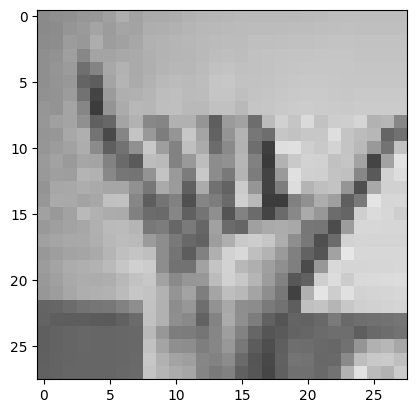

1/1 [==============================] - 0s 105ms/step
Predicted class: [23]
True class: 23


In [ ]:
import matplotlib.pyplot as plt
individual_test_image = test_generator[0][0][4]
individual_test_label = test_generator[0][1][4]


plt.imshow(individual_test_image, cmap="viridis")
plt.show()

prediction = model.predict(np.expand_dims(individual_test_image, axis=0)).argmax(axis=1)
print("Predicted class:", prediction)
print("True class:", individual_test_label.argmax())

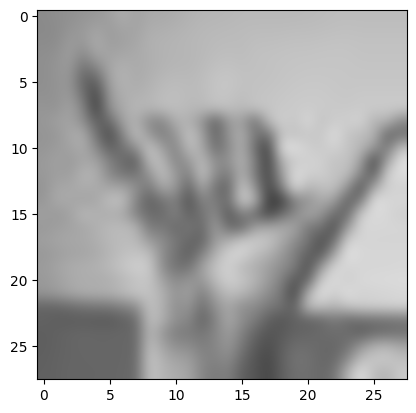

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(individual_test_image, interpolation='bicubic')
plt.show()

In [ ]:
model.save('recognition')

In [ ]:
pip install opencv-python


In [ ]:
pip install opencv-contrib-python

In [ ]:
import cv2
print(cv2.__version__)

4.8.0


In [ ]:
import cv2
import tensorflow as tf
model = tf.keras.models.load_model('recognition')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


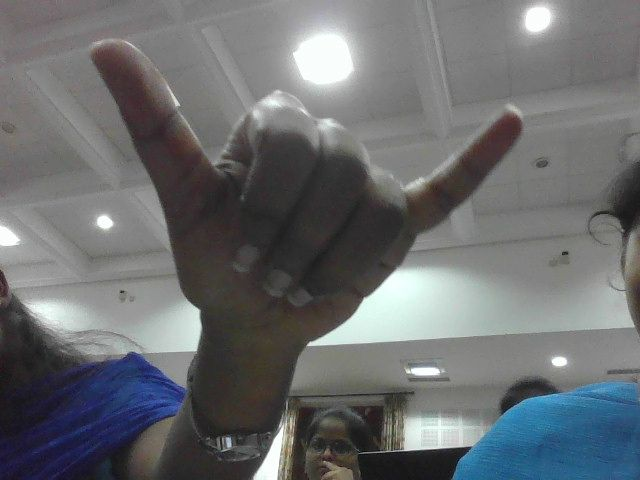

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
image = cv2.imread('photo.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (28,28))
image = image / 255.0

In [ ]:
prediction = model.predict(np.expand_dims(image, axis=0))

1/1 [==============================] - 0s 21ms/step


In [ ]:
predicted_class = prediction.argmax()

In [ ]:
print(predicted_class)

23
